In [47]:
from PIL import Image
import cv2
import numpy as np
import os

import cv2


In [48]:
# import zipfile
# path = 'OG.zip'  
# zip_object = zipfile.ZipFile(file=path, mode='r')
# zip_object.extractall('./')
# zip_object.close()

In [49]:
BASE_DIR = "/".join(os.path.abspath("__file__").split("/")[:-1]) + "/"
BASE_DIR

'/home/aypa/SPbPU/spbpu_sdt_homeworks/homeworks/09/'

In [50]:
def get_image_data(folder_name):
  paths = [os.path.join(folder_name, f) for f in os.listdir(folder_name)] #SAME PATH
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id_img = int(path.split('.')[1])
    ids.append(id_img)
    faces.append(image_np)
  
  return np.array(ids), faces

In [51]:
folder_with_images = BASE_DIR + "YB/"
ids, faces = get_image_data(folder_with_images)

In [52]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create() # make gray scale selfies  (approximately 40)
lbph_classifier.train(faces, ids)
path_to_classifierOG100 = BASE_DIR + "lbph_classifierOG100.yml"
lbph_classifier.write(path_to_classifierOG100)  #HERE I WRITE A CLASSIFIER, YOU CAN SEND YOUR PICTURES AND MAKE YOUR OWN CLASSIFIER

In [53]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read(path_to_classifierOG100)

In [54]:
path_to_image = BASE_DIR + "YB/person.1.1.jpg"
image = Image.open(path_to_image)
image.size

(2592, 1944)

In [55]:
paths = [os.path.join(folder_with_images, f) for f in os.listdir(folder_with_images)]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


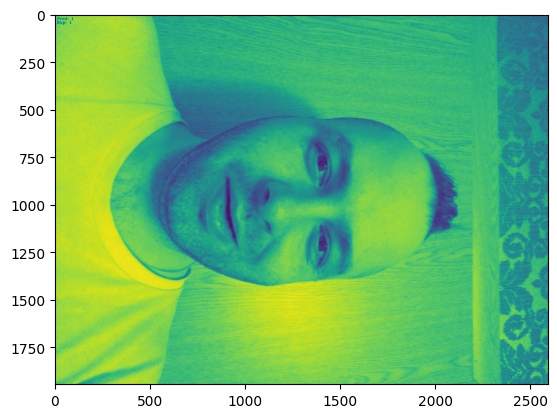

In [56]:
import matplotlib.pyplot as plt
plt.imshow(image_np)
plt.show()